# Import libraries and Data

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv(r'C:\Users\Elvin\Desktop\data science\CERTIFICATE-CV-KPMG\UNZIP_ME_FOR_NOTEBOOKS_ML_RUS_V1\08-Linear-Regression-Models\Advertising.csv')
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# We will check correlation between x and y 

        < 0.2 weak 
    0.2 < 0.5 low
    0.5 < 0.7 medium
    0.7 < 0.9 high
    0.9 > very high 

<AxesSubplot:>

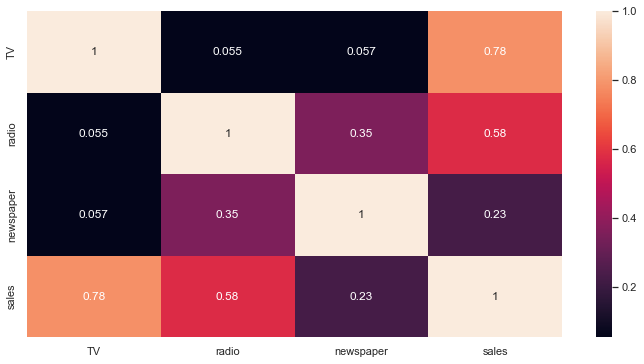

In [5]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr() , annot = True)

In [6]:
correlation = data.corr()
df = pd.DataFrame(correlation['sales'])
df

,sales
TV,0.782224
radio,0.576223
newspaper,0.228299
sales,1.000000


# For simple linear regression we will use only 1 independent column with best correlation score


In [7]:
my_x = data['TV']
my_y = data['sales']

<AxesSubplot:>

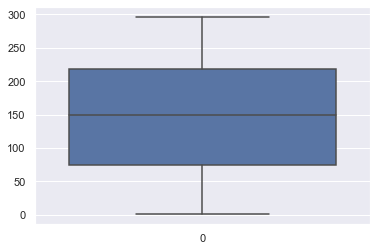

In [8]:
sns.boxplot(data = my_x)

<AxesSubplot:>

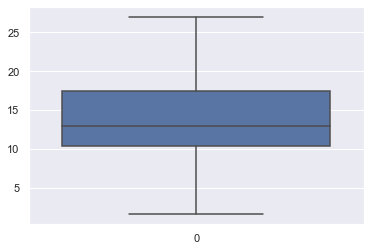

In [9]:
sns.boxplot(data = my_y)

In [10]:
x = sm.add_constant(my_x)
results = sm.OLS(my_y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        19:15:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
Constanta_intercept = 7.0326

In [12]:
Coefficient = 0.0475

# About our Summary Table

      Our R-Squared (accuracy) : 0.61 it is medium results
      Adj. R-squared (power of model) : 0.61 medium results also 
              P value : 0.05 > non significant
              P value : < 0.05 significant 
      P value in our model (P>|t|) : 0.000 for 2 columns. It means that our columns significant
 

# Lets calculate our Intercept and Coefficient manually

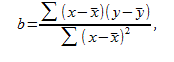

In [13]:
x_mean = data['TV'].mean()
print('X Average: ',x_mean)

X Average:  147.0425


In [14]:
y_mean = data['sales'].mean()
print('Y Average: ',y_mean)

Y Average:  14.022500000000003


In [15]:
data['x_mean'] = x_mean
data['y_mean'] = y_mean

In [16]:
data['x_resudials'] = data['x_mean'] - my_x
data['y_resudials'] = data['y_mean'] - my_y
data['x * y'] = data['x_resudials'] * data['y_resudials']
data['x_resudials**2'] = data['x_resudials']**2
data

,TV,radio,newspaper,sales,x_mean,y_mean,x_resudials,y_resudials,x * y,x_resudials**2
0,230.1,37.8,69.2,22.1,147.0425,14.0225,-83.0575,-8.0775,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,147.0425,14.0225,102.5425,3.6225,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,147.0425,14.0225,129.8425,4.7225,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,147.0425,14.0225,-4.4575,-4.4775,19.958456,19.869306
4,180.8,10.8,58.4,12.9,147.0425,14.0225,-33.7575,1.1225,-37.892794,1139.568806
...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,147.0425,14.0225,108.8425,6.4225,699.040956,11846.689806
196,94.2,4.9,8.1,9.7,147.0425,14.0225,52.8425,4.3225,228.411706,2792.329806
197,177.0,9.3,6.4,12.8,147.0425,14.0225,-29.9575,1.2225,-36.623044,897.451806
198,283.6,42.0,66.2,25.5,147.0425,14.0225,-136.5575,-11.4775,1567.338706,18647.950806


In [17]:
sum_of_xy = data['x * y'].sum()
print('Sum of x*y :', sum_of_xy)

Sum of x*y : 69727.64875


In [18]:
sum_of_square = data['x_resudials**2'].sum()
print('Sum of X Square :', sum_of_square)

Sum of X Square : 1466819.02875


In [19]:
Coefficient_calculate = sum_of_xy / sum_of_square
print('Our Coefficient is:', round(Coefficient,4))

Our Coefficient is: 0.0475


In [20]:
Intercept = y_mean - (x_mean * Coefficient)
print('Our Intercept is:', round(Intercept,4))

Our Intercept is: 7.038


# Lets analyse our datapoints on scatterplot and build best fitting line

<AxesSubplot:xlabel='TV', ylabel='sales'>

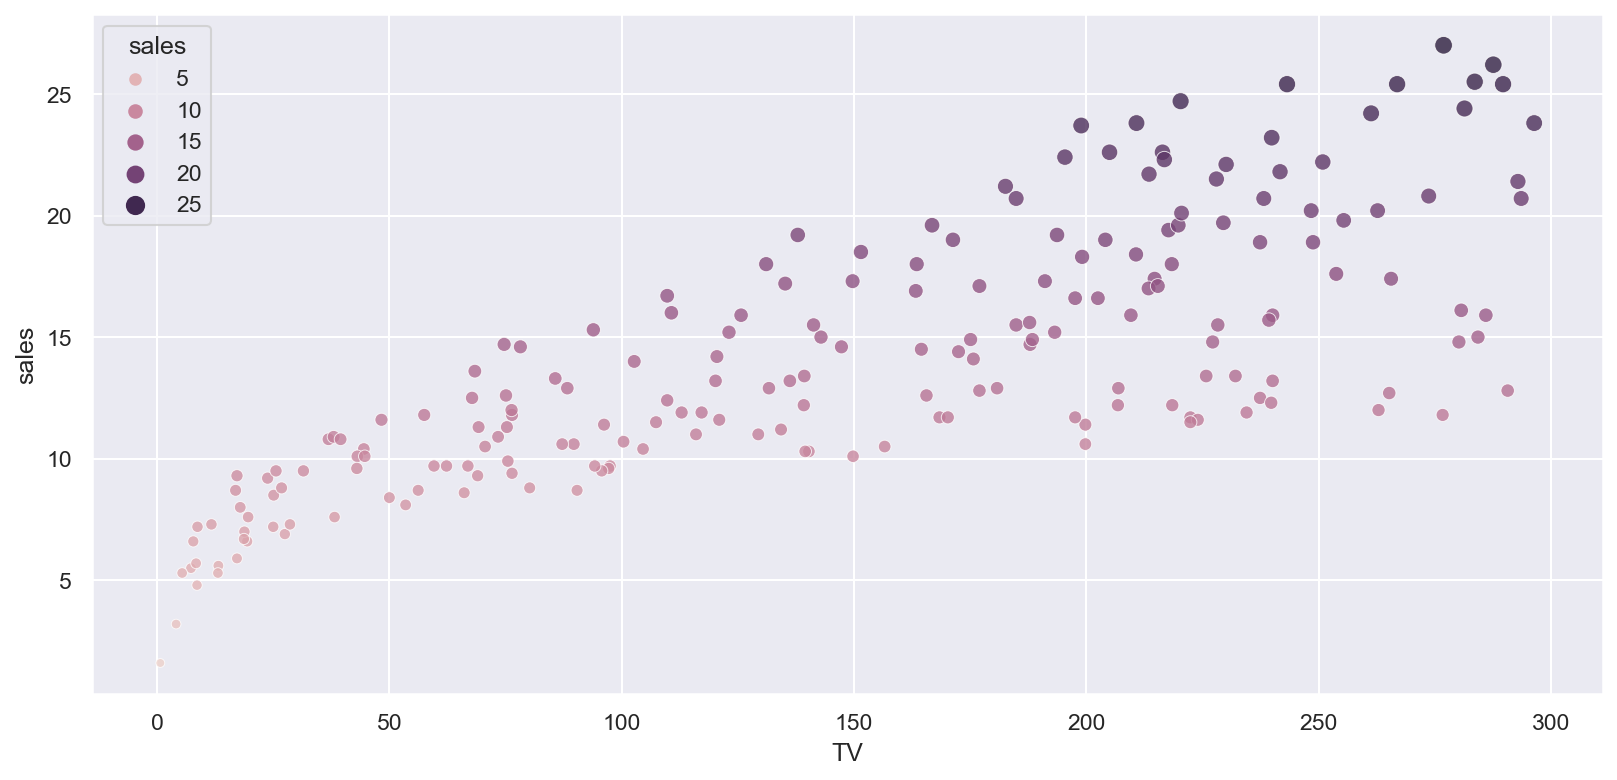

In [21]:
plt.figure(figsize=(13,6),dpi = 150)
sns.scatterplot(x = my_x , y = my_y, hue = my_y , alpha = 0.8 , size = my_y )

In [22]:
y_predict_best_line = Intercept + (Coefficient*my_x)

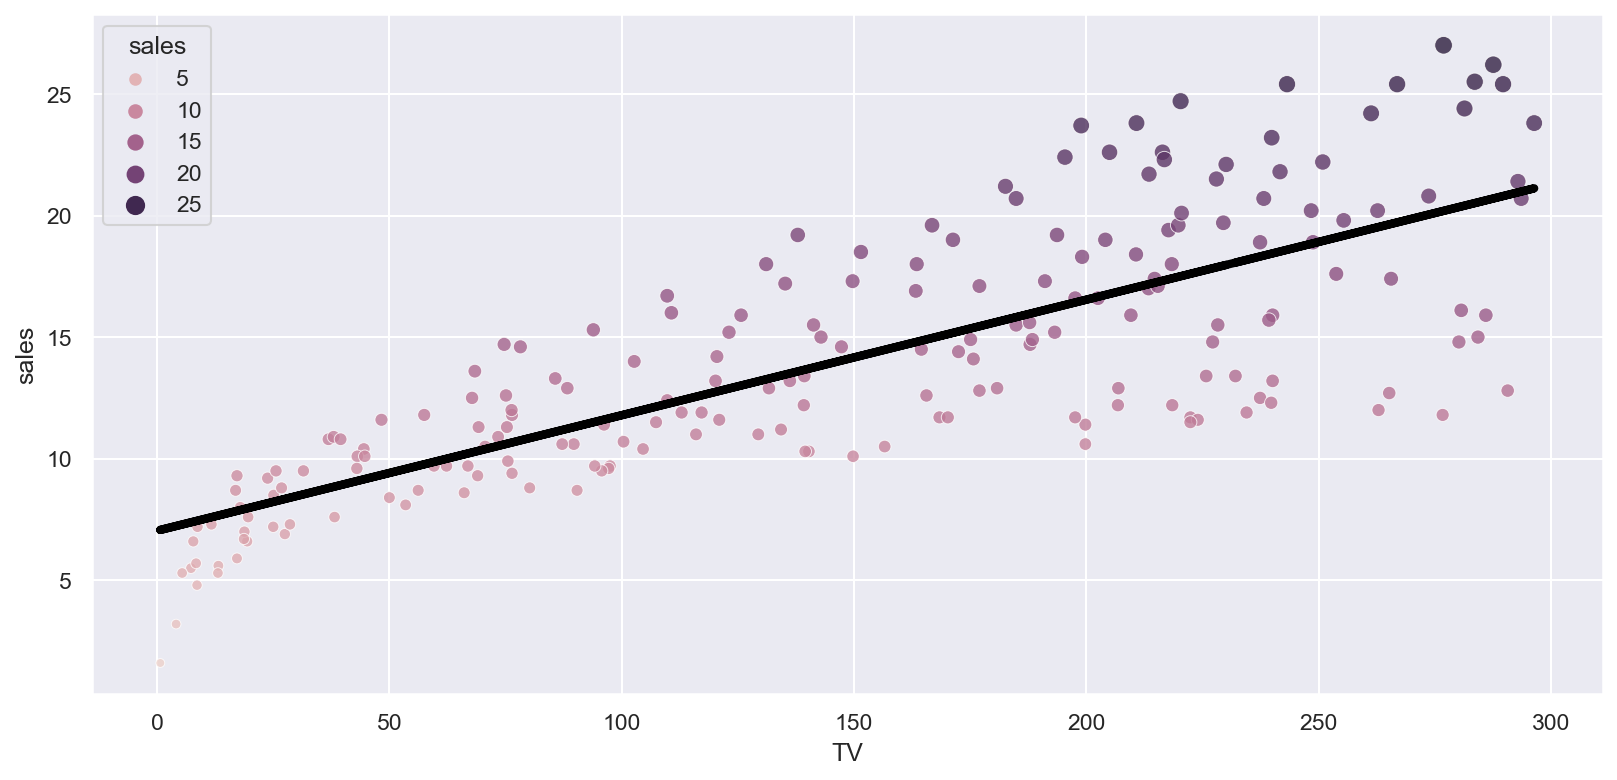

In [23]:
plt.figure(figsize=(13,6),dpi = 150)
sns.scatterplot(x = my_x , y = my_y, hue = my_y , alpha = 0.8 , size = my_y )
plt.plot(my_x, y_predict_best_line, lw = 4, c = 'black', label ='regression line')

# Lets create our Model with Scikit-Learn

In [24]:
data = data[['TV','sales']]

In [25]:
x = data[['TV']]
y = data['sales']

In [26]:
x.shape

(200, 1)

In [27]:
y.shape

(200,)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
X_train,X_test , y_train, y_test = train_test_split(x ,y ,test_size = 0.2 , random_state = 42)

In [30]:
LinearReg = LinearRegression()

In [31]:
LinearReg.fit(X_train, y_train)

LinearRegression()

In [32]:
LinearReg.intercept_

7.1196384305929525

In [33]:
LinearReg.coef_

array([0.04652973])

In [34]:
y_predict = LinearReg.predict(X_test)

In [35]:
Compare = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
Compare.sample(frac = 0.2)

,Predicted,Actual
182,9.734609,8.7
45,15.266995,14.9
30,20.748197,21.4
115,10.614021,12.6
68,18.165797,18.9
75,7.905991,8.7
84,17.053737,21.7
76,8.399206,6.9


# Lets calculate our metrics (MAE,MSE,RMSE)

In [36]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [37]:
errors = abs(y_predict - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 2.44


In [38]:
Mean_Absolute_Error = mean_absolute_error(y_predict,y_test)
print('Mean Absolute Error:',round(Mean_Absolute_Error,2))

Mean Absolute Error: 2.44


In [39]:
Mean_Squared_Error = mean_squared_error(y_predict,y_test)
print('Mean Squared Error:',round(Mean_Squared_Error,2))

Mean Squared Error: 10.2


In [40]:
Root_Mean_Square_Error = np.sqrt(mean_squared_error(y_predict,y_test))
print('RMSE:',round(Root_Mean_Square_Error,2))

RMSE: 3.19


# Lets calculate our Accuracy

In [41]:
MAPE = 100*(errors / y_test)
Accuracy = 100 - np.mean(MAPE)
print('Accuracy is :',round(Accuracy , 2),'%')

Accuracy is : 81.33 %


<Figure size 3000x1500 with 0 Axes>

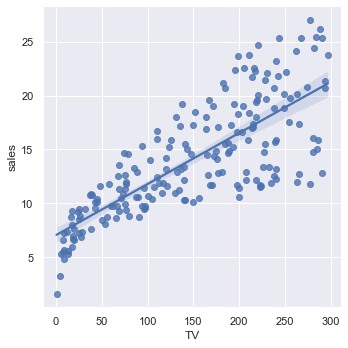

In [42]:
plt.figure(figsize=(20,10),dpi = 150)
sns.lmplot(x = 'TV',y = 'sales',data = data)

# Residual and other plots for analyze

In [43]:
data['y_predict'] = 7.1196384305929525 + (data['TV'] * 0.04652973)

C:\Users\Elvin\AppData\Local\Temp\ipykernel_10052\2476958804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y_predict'] = 7.1196384305929525 + (data['TV'] * 0.04652973)


In [44]:
data.head(6)

,TV,sales,y_predict
0,230.1,22.1,17.826129
1,44.5,10.4,9.190211
2,17.2,9.3,7.919950
3,151.5,18.5,14.168893
4,180.8,12.9,15.532214
5,8.7,7.2,7.524447


In [45]:
data['residuals'] = data['sales'] - data['y_predict']

C:\Users\Elvin\AppData\Local\Temp\ipykernel_10052\35062243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['residuals'] = data['sales'] - data['y_predict']


<AxesSubplot:xlabel='residuals', ylabel='Density'>

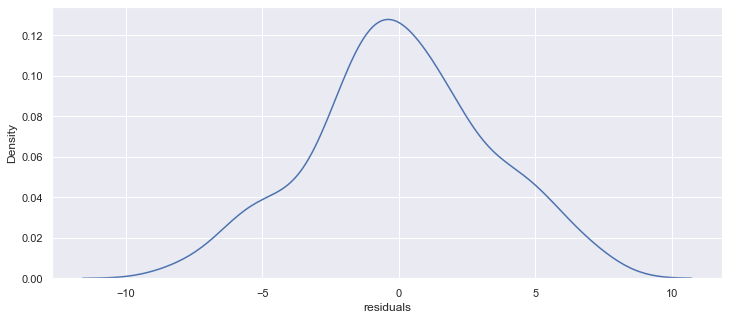

In [46]:
plt.figure(figsize = (12,5))
sns.kdeplot(data['residuals'])

    As we see, our residuals have the normal distributions
    Now we should show residuals in scatter plot and check them

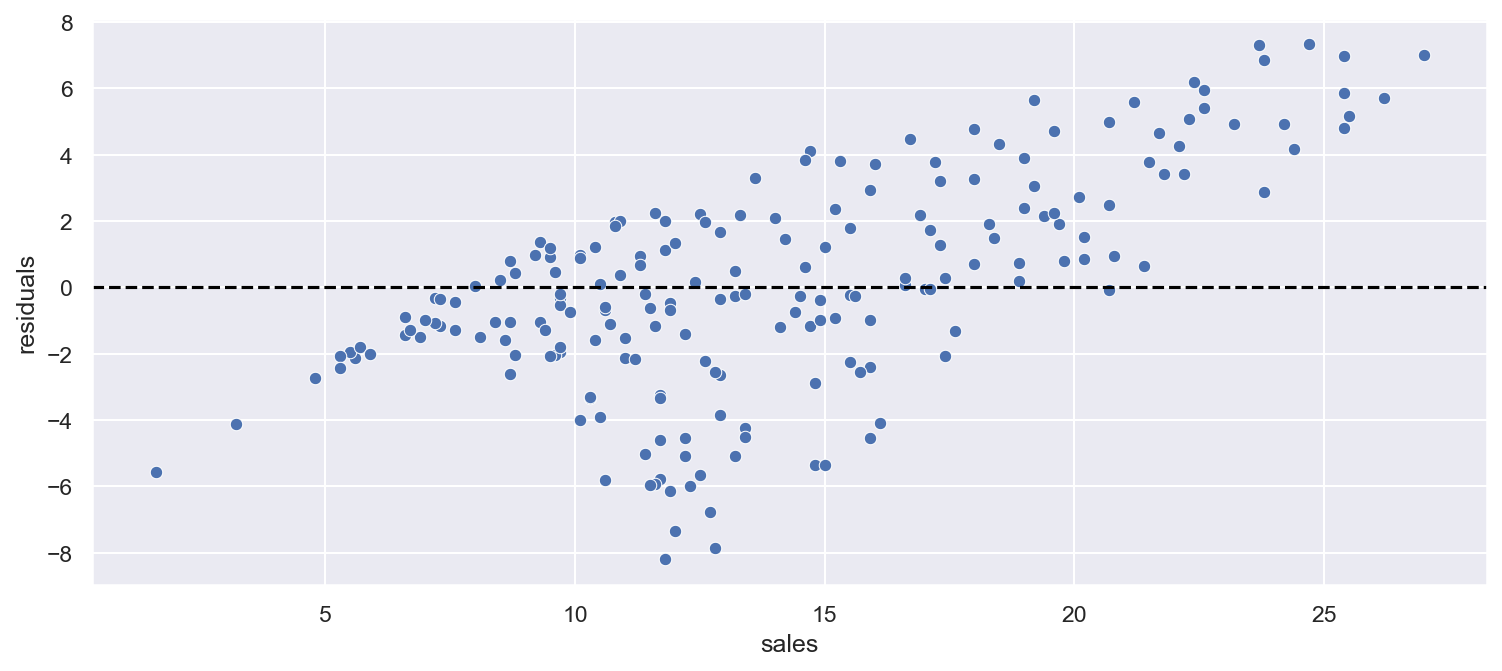

In [47]:
plt.figure(figsize = (12,5),dpi = 150)
sns.scatterplot(x = data['sales'],y = data['residuals'])
plt.axhline( y = 0, color = 'black', linestyle='--')

# Lets check our predictions with new datasets

In [48]:
new_data = pd.DataFrame({'TV':[177,210,233,140,90,202]})
new_data

,TV
0,177
1,210
2,233
3,140
4,90
5,202


In [49]:
new_data['sales'] = LinearReg.predict(new_data[['TV']])
new_data

,TV,sales
0,177,15.355401
1,210,16.890883
2,233,17.961066
3,140,13.633801
4,90,11.307314
5,202,16.518645


In [50]:
print(LinearReg.intercept_)
print(LinearReg.coef_)

7.1196384305929525
[0.04652973]


Also we can check our results manually

In [51]:
new_data['manually_pred'] = 7.1196384305929525 + (new_data['TV']*0.04652973)
new_data

,TV,sales,manually_pred
0,177,15.355401,15.355401
1,210,16.890883,16.890882
2,233,17.961066,17.961066
3,140,13.633801,13.633801
4,90,11.307314,11.307314
5,202,16.518645,16.518644
